<a href="https://colab.research.google.com/github/orsli/Data-Science-Fundamentals/blob/main/CodingTask1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Science Fundamentals for DCBP, S. Haug, University of Bern

# Coding Task 1

- Deadline: Send your solution notebook per email to Sigve by 2022-03-22 17:00
- Estimated effort: 2-5 hours (if you don't progress after 2 hours of trying, search for help, ChatGPT, Google, colleagues, course tutor)
- Data on Ilias: CCD-Data with metadata file CCD-Metadata


## Tasks (maximum 12.5 points)

- **CT-1.1** Write a method (function) which removes the header information in the
datafile and saves that information into a separate textfile. [0.5 points]
- **CT-1.2** Write a function which reduces the data resolution by merging/averaging columns such that there is only one column per 1 nm. [2.0 points]  
- **CT-1.3** Now generalize the above merging so that it works for any number nm er column. [2.0 points]
- **CT-1.4** Implement the saving of the reduced dataset to a file. Do this (1) by writing an explicit loop (write line by line) and (2) by using pandas methods. Measure the running times of the two approaches. [2.0 points]
- **CT-1.5** Write a function which takes two wavelengths as input and plots the difference of the data at these lengths over time. [2.0 points]
- **CT-1.6** Let the x-axis be in seconds, label the axes with names and units, label the plot with color and legend, make a title for the plot. Save the plot to a file. [2.0 points]
- **CT-1.7** Plot the full and some reduced datasets in the same figure. Is there any visual difference? [2.0 points]

In [2]:
from google.colab import drive
import pandas as pd
import math
import matplotlib.pyplot as plt

drive.mount('/content/drive')
path = '/content/drive/MyDrive/Data-CCD/CCD-Data.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# CT-1.1

def meta(read_file, write_file):
    with open(read_file, 'r') as read_file, open(write_file, 'w') as write_file:
        textlines = read_file.readlines()

        for i in range(14):
            write_file.write(textlines[i])


write_path = '/content/drive/MyDrive/Data-CCD/CCD-Data-only-header.txt'
meta(path, write_path)


In [4]:
# CT-1.2

def reduce_data(file):
    df = pd.read_csv(file)
    new_df = df.iloc[:, 3:]
    new_cols = {col: math.floor(float(col)) for col in new_df.columns}
    new_df = new_df.rename(columns=new_cols)
    red_df = new_df.groupby(new_df.columns, axis=1).mean()

    return red_df


reduce_data(path)

,316,317,318,319,320,321,322,323,324,325,...,771,772,773,774,775,776,777,778,779,780
0,0.329672,-0.166957,-0.064746,0.133130,0.123705,-0.249831,0.271327,-0.093151,-0.123458,-0.026454,...,-0.038555,-0.038021,-0.039290,-0.038654,-0.036496,-0.038835,-0.038145,-0.038333,-0.037679,-0.035545
1,-0.044412,-0.411839,-0.133472,2.032979,-0.387814,-0.031617,0.322955,1.744725,-0.051639,-0.147937,...,-0.038100,-0.038118,-0.038622,-0.038308,-0.036896,-0.039010,-0.038400,-0.037930,-0.037812,-0.038165
2,0.338219,-0.094507,-0.024912,0.061890,-0.226986,0.107871,0.121011,-0.208504,-0.418836,0.005751,...,-0.038063,-0.038303,-0.039200,-0.038397,-0.036932,-0.038245,-0.037664,-0.037514,-0.037057,-0.036903
3,-0.049682,0.027980,-0.008338,-0.088350,0.070348,-0.013674,0.307321,0.159532,-0.047932,0.080549,...,-0.037775,-0.037678,-0.038711,-0.038133,-0.036972,-0.038177,-0.037273,-0.036996,-0.036614,-0.036822
4,0.335086,-0.162378,-0.102281,0.045717,-0.088278,0.042099,0.304675,-0.261077,-0.009424,0.153932,...,-0.038433,-0.038135,-0.038991,-0.038178,-0.037010,-0.038540,-0.038076,-0.037606,-0.038132,-0.035900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,-0.048929,-0.438802,1.870540,-0.089910,0.026243,0.046500,0.342797,-0.024736,0.087382,-0.000370,...,-0.037537,-0.036913,-0.038062,-0.037199,-0.035328,-0.037879,-0.037486,-0.036303,-0.036122,-0.033582
351,0.851907,-0.282855,-0.039069,-0.227483,-0.140185,0.055663,0.211854,-0.064256,0.039251,-0.158020,...,-0.036774,-0.036255,-0.037614,-0.037000,-0.035254,-0.037384,-0.036114,-0.035518,-0.035928,-0.035408
352,0.329255,-0.074950,0.074278,-0.053091,-0.073518,0.004167,0.393093,-0.051061,0.048273,-0.049056,...,-0.037064,-0.037087,-0.037948,-0.036972,-0.035591,-0.036524,-0.036691,-0.036766,-0.036246,-0.035039
353,0.330061,-0.260591,-0.020120,0.093793,0.100177,0.134214,0.319046,0.029385,0.033831,-0.089956,...,-0.036520,-0.036748,-0.037822,-0.036839,-0.035118,-0.037559,-0.036426,-0.036488,-0.036505,-0.034496


In [5]:
# CT-1.3

def reduce_ndata(file, nm_start, nm_step):
    df = pd.read_csv(file)
    new_df = df.iloc[:, 3:-1]

    new_cols = {col: (float(col) - nm_start) // nm_step for col in new_df.columns}
    new_df = new_df.rename(columns=new_cols)
    new_df = new_df.groupby(new_df.columns, axis=1).mean()

    new_cols = {col: int((float(col) * nm_step + nm_start)) for col in new_df.columns}
    new_df = new_df.rename(columns=new_cols)
    return new_df


reduce_ndata(path, 316, 47)

,316,363,410,457,504,551,598,645,692,739
0,0.121827,0.649246,0.427625,0.045787,0.068881,0.005093,-0.040418,-0.045367,-0.043624,-0.039763
1,0.304617,0.710229,0.435418,0.046129,0.069003,0.005006,-0.040427,-0.045349,-0.043727,-0.039895
2,0.167755,0.711276,0.436632,0.046424,0.069082,0.004940,-0.040506,-0.045412,-0.043752,-0.039884
3,0.139196,0.662436,0.433072,0.046464,0.069533,0.005576,-0.039740,-0.044731,-0.043105,-0.039249
4,0.138315,0.637195,0.426522,0.045920,0.069018,0.005243,-0.040255,-0.045213,-0.043458,-0.039639
...,...,...,...,...,...,...,...,...,...,...
350,0.184437,0.502521,0.498316,-0.006446,0.097904,-0.013373,-0.050695,-0.052203,-0.047604,-0.039297
351,0.113636,0.486997,0.506825,-0.005532,0.098458,-0.012885,-0.050285,-0.051644,-0.047155,-0.038759
352,0.117502,0.512031,0.511500,-0.006081,0.098103,-0.013292,-0.050578,-0.052084,-0.047524,-0.039095
353,0.155292,0.505649,0.518072,-0.005810,0.098372,-0.013158,-0.050492,-0.051925,-0.047345,-0.038998


In [6]:
red_df = reduce_data(path)

In [7]:
# CT-1.4 with pandas

%%time
red_df.to_csv('/content/drive/MyDrive/Data-CCD/CCD-Data-CT141.csv')

CPU times: user 211 ms, sys: 31.1 ms, total: 242 ms
Wall time: 570 ms


In [8]:
# CT-1.4 with explicit loop

%%time
with open('/content/drive/MyDrive/Data-CCD/CCD-Data-CT142.csv', 'w') as outstream, open('/content/drive/MyDrive/Data-CCD/CCD-Data-CT141.csv', 'r') as instream:
  lines = instream.readlines()
  for line in lines:
    outstream.writelines(line)

CPU times: user 203 ms, sys: 8.19 ms, total: 211 ms
Wall time: 577 ms


In [9]:
df = pd.read_csv(path)

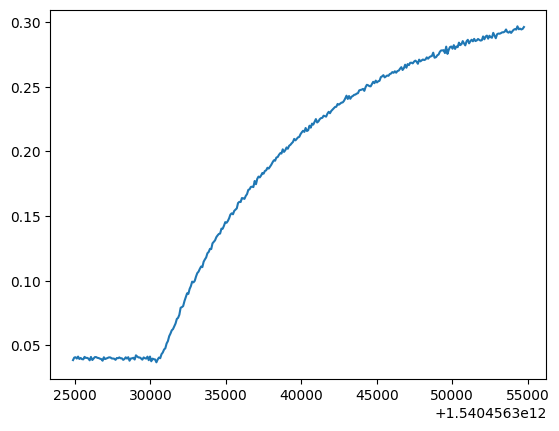

In [10]:
# CT-1.5

def plotWL(a, b):
  x = df.iloc[1:, 2]
  y = - (df.iloc[1:, b] - df.iloc[1:, a])
  plt.plot(x, y)


plotWL(1780, 1940)

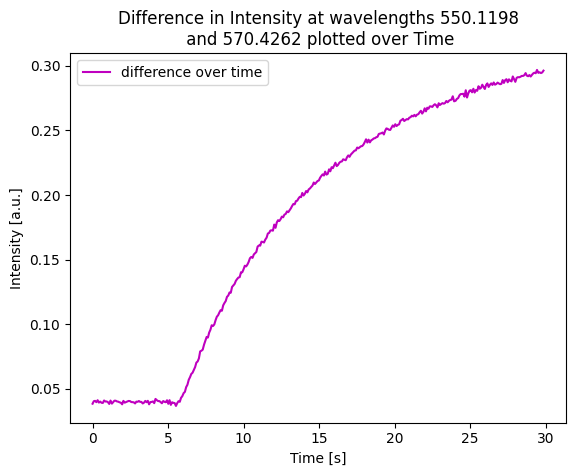

In [11]:
# CT-1.6

def plotWL2(a,b):
  x = (df.iloc[1:, 2] - df.iloc[1, 2]) / 1000
  y = - (df.iloc[1:, b] - df.iloc[1:, a])

  plt.plot(x, y, color='m', label='difference over time')
  plt.xlabel('Time [s]')
  plt.ylabel('Intensity [a.u.]')
  plt.title('Difference in Intensity at wavelengths ' + str(df.columns[a]) +
            '\n and ' + str(df.columns[b]) + ' plotted over Time')
  plt.legend()
  plt.savefig('/content/drive/MyDrive/Data-CCD/WL-difference-plot.png')
  plt.show()


plotWL2(1780, 1940)

In [12]:
nred_df = reduce_ndata(path, 316, 20)

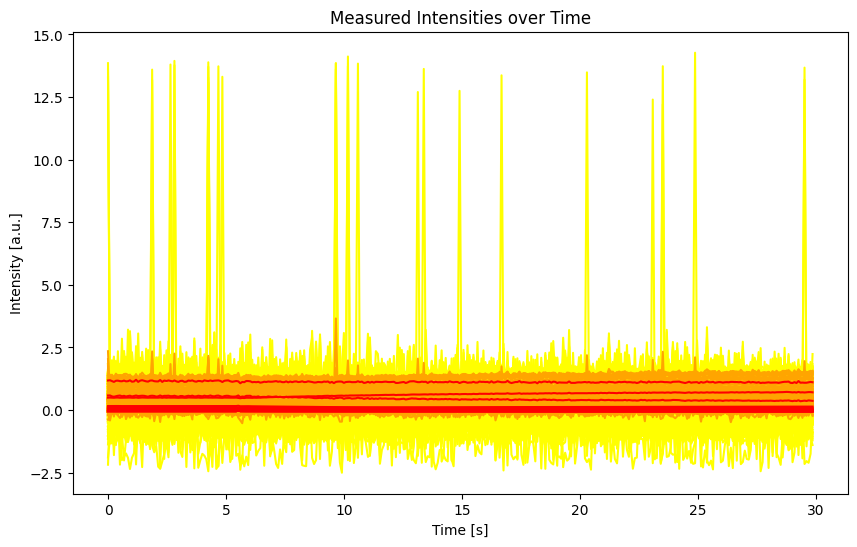

In [18]:
# CT-1.7

time = (df.iloc[1:, 2] - df.iloc[1, 2]) / 1000
intensities = df.iloc[1:, 3:]
red_intensities = red_df.iloc[1:, 3:]
nred_intensities = nred_df.iloc[1:, 3:]

plt.figure(figsize=(10, 6))
plt.plot(time, intensities, color='yellow', label='full dataset')
plt.plot(time, red_intensities, color='orange', label='wavelengths reduced to 1 nm')
plt.plot(time, nred_intensities, color='red', label='wavelengths reduced to 20 nm')
plt.xlabel('Time [s]')
plt.ylabel('Intensity [a.u.]')
plt.title('Measured Intensities over Time')
plt.show()